In [1]:
import sys
import ROOT as rt
import uproot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import aghast
from ROOT import TFile

Welcome to JupyROOT 6.18/00


In [2]:
def np_to_root(numpy_hist, name='root_hist'):
    ghastly_hist = aghast.from_numpy(numpy_hist)
    return aghast.to_root(ghastly_hist, name)

def get_max_notrunc(hist, cl = 0.95):
    normcumsum  = 1.*np.cumsum(hist[0])/sum(hist[0])
    return int(hist[1][np.argmax(normcumsum>cl)])

In [3]:
upfile = uproot.open('samples_ttbar/TTbar_had20.root')
outdir = 'plots_ttbar_tot/plots_had20/'
tree = upfile['ntuple/tree']

In [4]:
def get_hists(objs=['Calo'],detector='Barrel', split=0.5, outdir='Plots/'):
    arrays = []
    for obj in objs:
        var = 'l1pfProducer%svecNL1%s'%(detector,obj)
        mask = tree.array('mc_id')==998
        array = tree.pandas.df([var]).values
        array = np.reshape(array, (tree.numentries, -1))
        array = array[mask]
        arrays.append(array)
    array = np.sum(arrays,axis=0)
    nregions = array.shape[1]
    array[:,::-1].sort(axis=-1)
    top_N = array[:,:int(split*nregions)]
    top_N_max = np.sum(top_N, axis=-1, dtype = np.uint8)
    bins = np.linspace(0, np.max(top_N_max)+5,  np.max(top_N_max)+6)
    top_N_max_hist = np.histogram(top_N_max,bins=bins)
    top_notrunc = get_max_notrunc(top_N_max_hist) 
    plt.figure(figsize=(5,5))
    if split<1:
        bot_N = array[:,int(split*nregions):]
        bot_N_max = np.sum(bot_N, axis=-1, dtype = np.uint8)
        bins_b = np.linspace(0, np.max(bot_N_max)+5,  np.max(bot_N_max)+6)
        bot_N_max_hist = np.histogram(bot_N_max,bins=bins_b)
        bot_notrunc = get_max_notrunc(bot_N_max_hist) 
        plt.hist(top_N_max,bins=bins,alpha=0.7,label = 'top %i%%, 95%% no trunc: %i'%(split*100, top_notrunc))
        plt.hist(bot_N_max,bins=bins_b,alpha=0.7,label='bottom %i%%, 95%% no trunc: %i'%((1-split)*100, bot_notrunc))
    else:   
        plt.hist(top_N_max,bins=bins,alpha=0.7,label = '95%% no trunc: %i'%(top_notrunc))
    plt.semilogy()
    if len(objs) > 2:
        plt.xlabel('Max %s in %s region'%('+'.join(objs), detector), fontsize=6)
    else:
        plt.xlabel('Max %s in %s region'%('+'.join(objs), detector))
    #plt.xlim(0, np.max(top_N_max)+3)
    plt.ylabel('Events')
    plt.legend()
    plt.savefig('%s/%sMax%sSplit%s.pdf'%(outdir,''.join(objs),detector,int(split*100)))
    if split<1:
        return top_N_max_hist, bot_N_max_hist
    else:
        return top_N_max_hist, None

def get_arrays(objs=['Calo'],detectors=['Barrel']):
    for detector in detectors:
        for obj in objs:
            var = 'l1pfProducer%svecNL1%s'%(detector,obj)
            array = tree.pandas.df([var]).values
            array = np.reshape(array, (tree.numentries, -1))
            nregions = array.shape[1]
            print(array.shape)           
#get_arrays(objs=['Calo', 'EmCalo', 'TK', 'Mu'],detectors=['Barrel', 'HGCal', 'HGCalNoTK', 'HF'])
#print(tree.keys())

[108 128  89 ... 124  83  95]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   1   1   0   2   1   0   0   2   0   1   0   4   3
   7   7   7  10   8   4  18  14  16  13  28  25  28  53  39  50  62  61
  67  64  73  91  89 126 130 135 160 183 178 181 206 215 240 263 270 265
 290 295 360 374 352 372 404 416 434 440 468 467 451 449 485 483 501 521
 487 487 489 511 497 487 489 497 439 481 495 475 458 472 409 391 370 391
 376 359 347 304 343 295 262 250 248 240 227 224 206 179 176 167 138 129
 118 123  83  94  71  64  77  61  49  49  45  50  44  31  36  30  34  23
  19  19  14  21   6  13   7   5  12   6   7   5   3   5   5   5   2   1
   5   1   0   0   3   0   0   1   0   0   0   1   0   0   1   0   0   0
   0   0   1   0   0   0   0]
TOP
BOT
Calo Barrel 95% no trunc. top 224 bottom 143
[ 33 101  86 ... 144 226  52]
[ 95  94  89 111 108 107 104 112 107 106 142 138 118 1

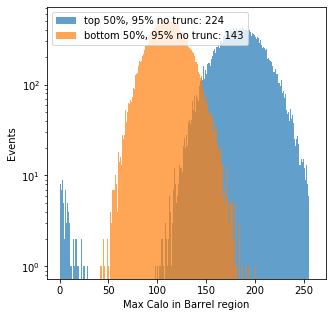

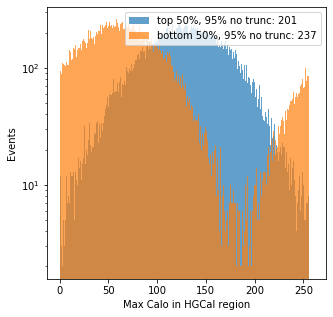

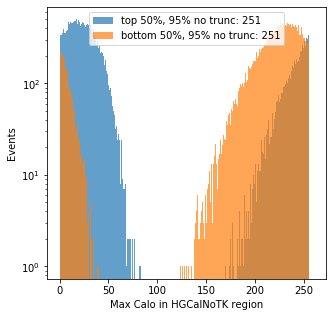

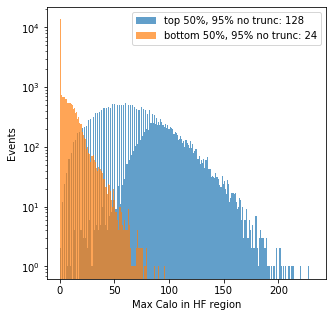

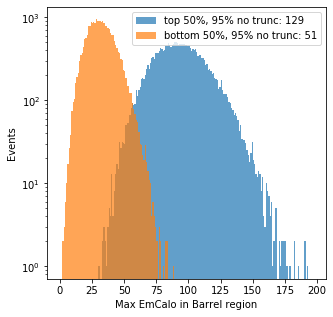

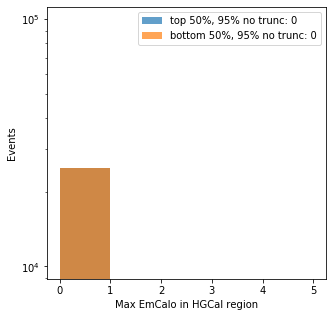

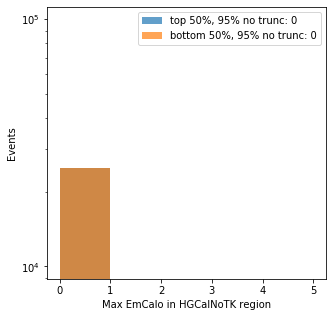

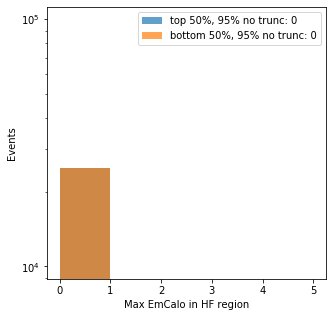

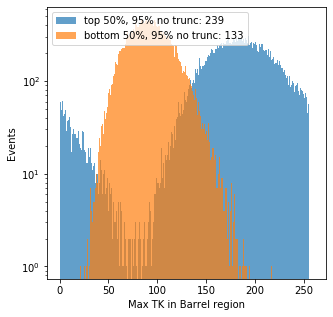

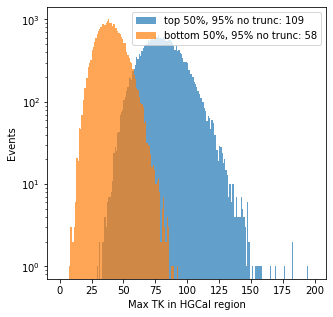

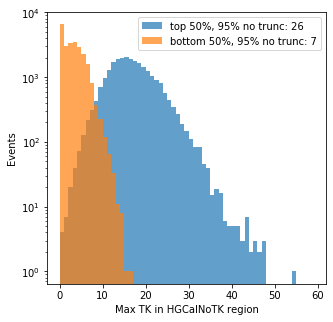

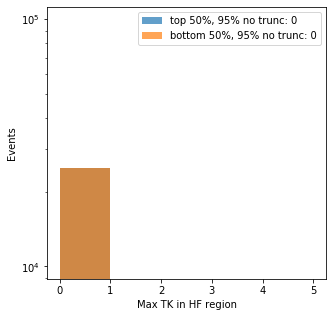

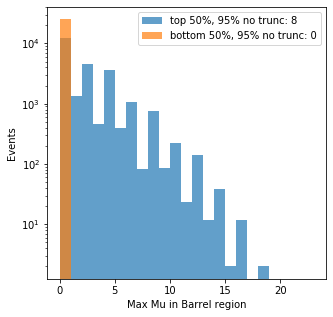

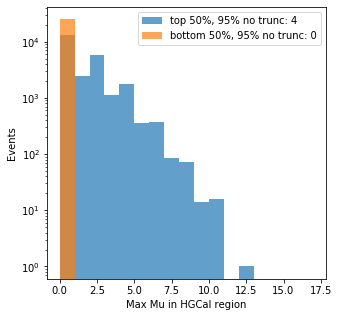

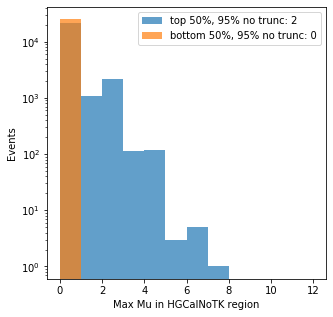

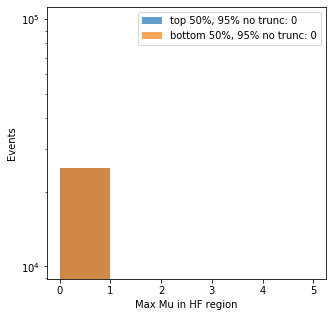

In [5]:
for obj in ['Calo', 'EmCalo', 'TK', 'Mu']:
    for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
        top_N_max_hist, bot_N_max_hist = get_hists(objs=[obj], detector=detector, split=0.5, outdir=outdir)
        print("TOP")
        top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
        bot_N_max_hist_95cl = get_max_notrunc(bot_N_max_hist, cl=0.95)
        print(obj, detector, '95% no trunc.', 'top', top_N_max_hist_95cl, 'bottom', bot_N_max_hist_95cl)

PFChargedHadron Barrel 95% no trunc. top 127
PFChargedHadron HGCal 95% no trunc. top 44
PFChargedHadron HGCalNoTK 95% no trunc. top 0
PFChargedHadron HF 95% no trunc. top 0
PFNeutralHadron Barrel 95% no trunc. top 89
PFNeutralHadron HGCal 95% no trunc. top 139
PFNeutralHadron HGCalNoTK 95% no trunc. top 80
PFNeutralHadron HF 95% no trunc. top 49
PFElectron Barrel 95% no trunc. top 8
PFElectron HGCal 95% no trunc. top 38
PFElectron HGCalNoTK 95% no trunc. top 0
PFElectron HF 95% no trunc. top 0
PFPhoton Barrel 95% no trunc. top 86
PFPhoton HGCal 95% no trunc. top 234
PFPhoton HGCalNoTK 95% no trunc. top 154
PFPhoton HF 95% no trunc. top 0
PFMuon Barrel 95% no trunc. top 2
PFMuon HGCal 95% no trunc. top 1
PFMuon HGCalNoTK 95% no trunc. top 0
PFMuon HF 95% no trunc. top 0


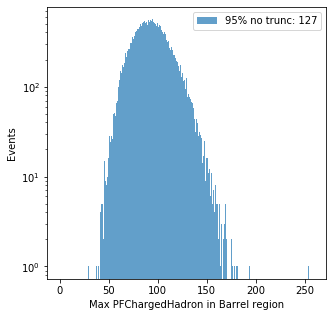

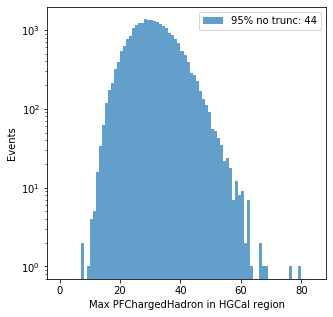

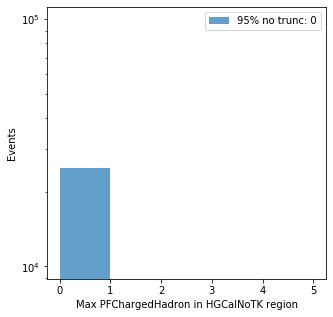

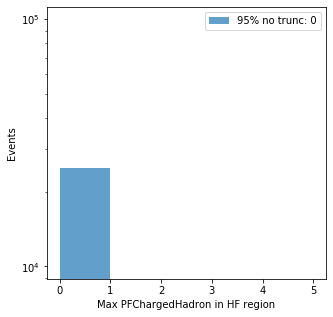

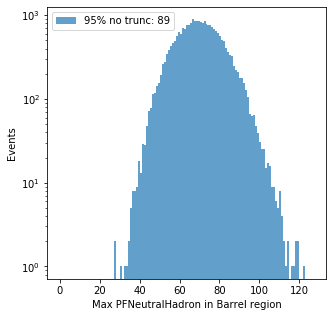

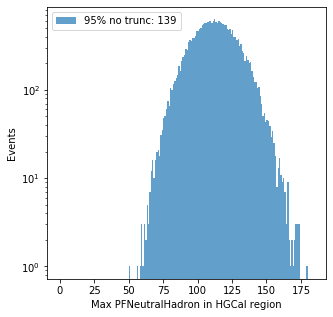

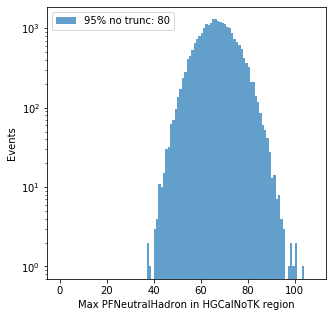

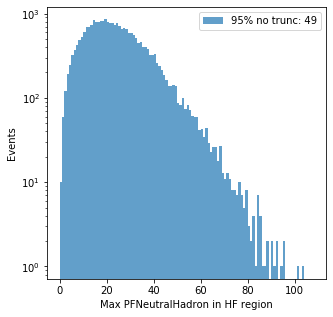

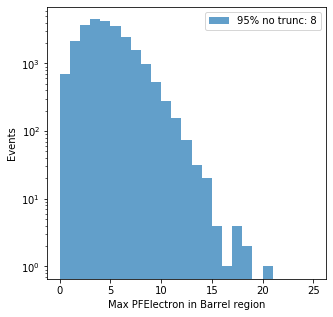

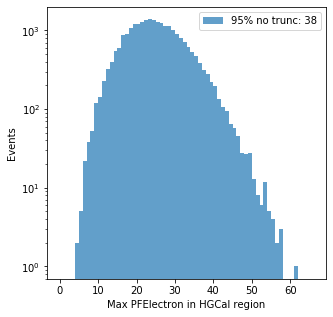

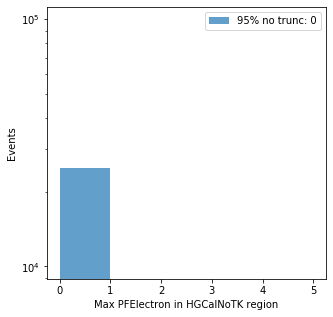

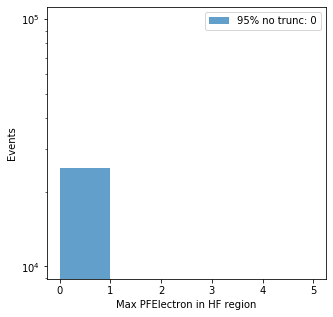

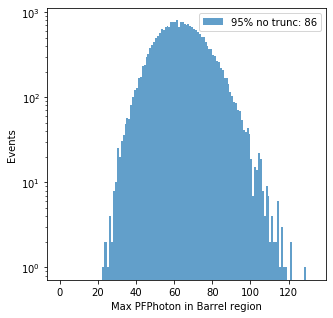

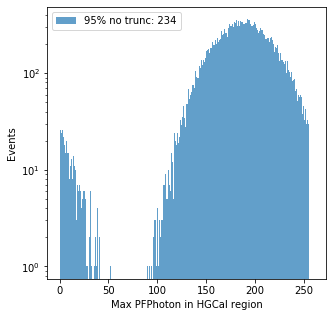

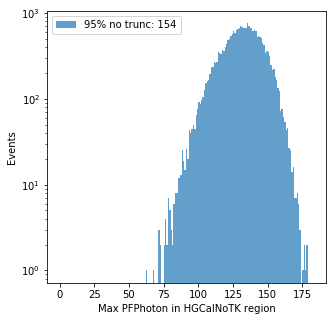

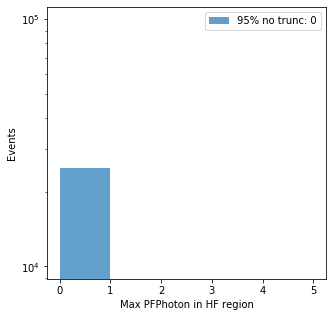

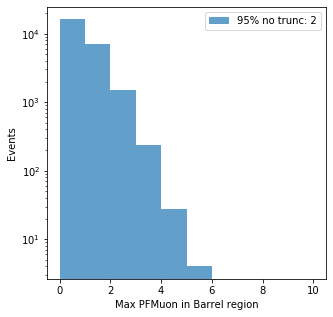

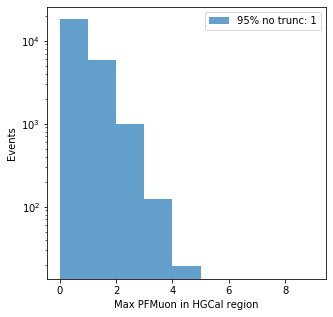

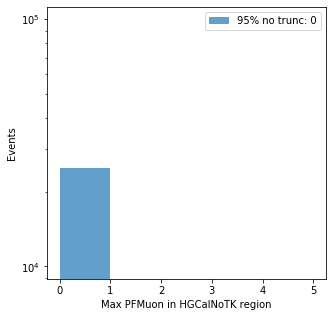

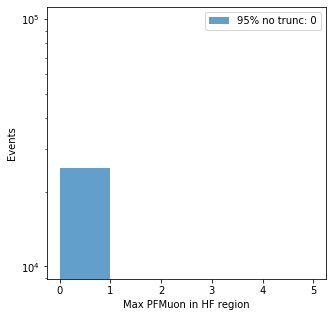

In [6]:
f = TFile('PF.root', 'RECREATE')
for obj in ['PFChargedHadron','PFNeutralHadron', 'PFElectron','PFPhoton', 'PFMuon']:
    for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
        top_N_max_hist, bot_N_max_hist = get_hists(objs=[obj], detector=detector, split=1, outdir=outdir)
        top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
        print(obj, detector, '95% no trunc.', 'top', top_N_max_hist_95cl)

PuppiChargedHadron Barrel 95% no trunc. top 38
PuppiChargedHadron HGCal 95% no trunc. top 16
PuppiChargedHadron HGCalNoTK 95% no trunc. top 0
PuppiChargedHadron HF 95% no trunc. top 0
PuppiNeutralHadron Barrel 95% no trunc. top 6
PuppiNeutralHadron HGCal 95% no trunc. top 4
PuppiNeutralHadron HGCalNoTK 95% no trunc. top 3
PuppiNeutralHadron HF 95% no trunc. top 1
PuppiElectron Barrel 95% no trunc. top 5
PuppiElectron HGCal 95% no trunc. top 14
PuppiElectron HGCalNoTK 95% no trunc. top 0
PuppiElectron HF 95% no trunc. top 0
PuppiPhoton Barrel 95% no trunc. top 21
PuppiPhoton HGCal 95% no trunc. top 9
PuppiPhoton HGCalNoTK 95% no trunc. top 3
PuppiPhoton HF 95% no trunc. top 0
PuppiMuon Barrel 95% no trunc. top 2
PuppiMuon HGCal 95% no trunc. top 1
PuppiMuon HGCalNoTK 95% no trunc. top 0
PuppiMuon HF 95% no trunc. top 0


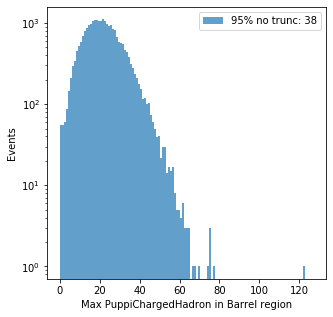

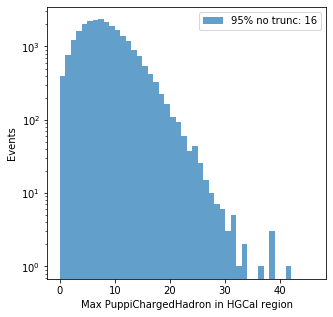

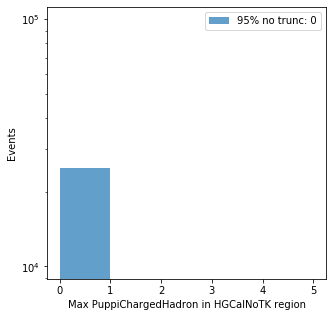

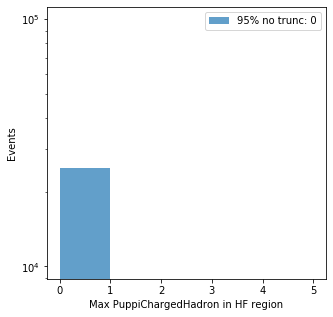

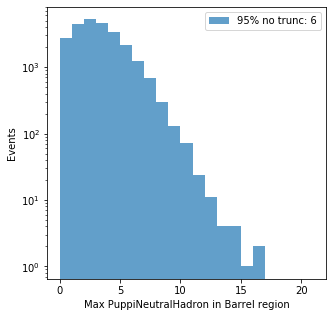

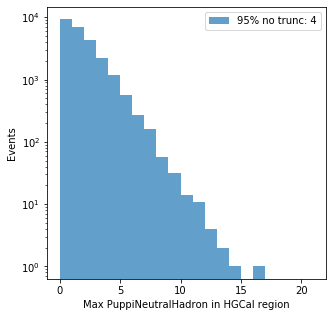

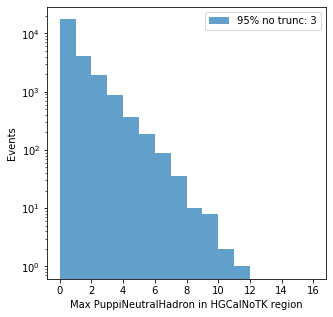

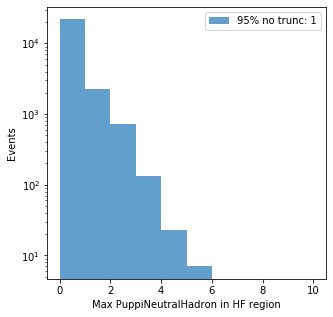

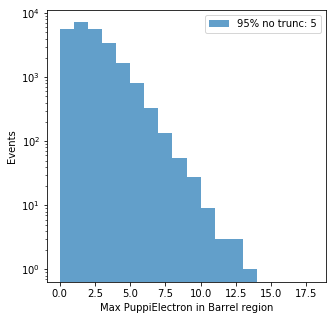

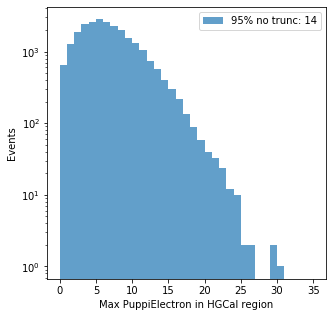

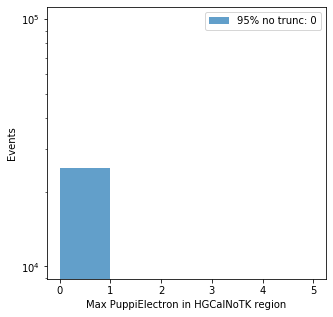

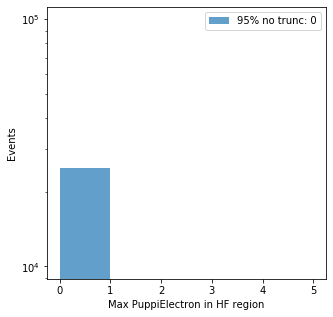

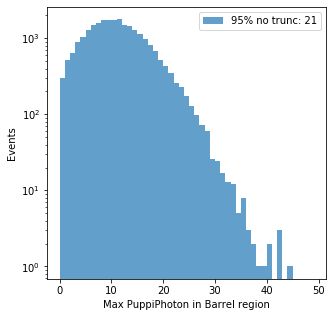

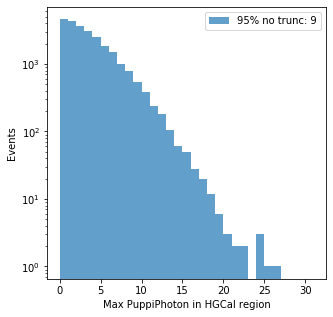

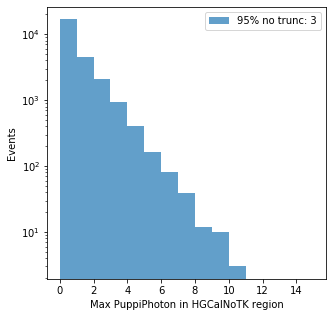

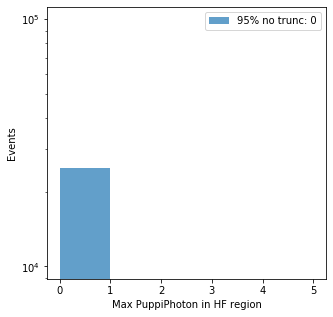

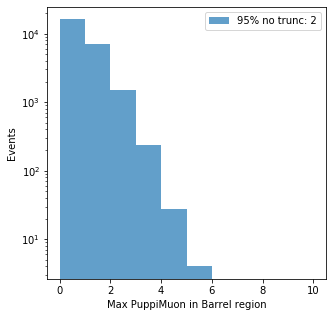

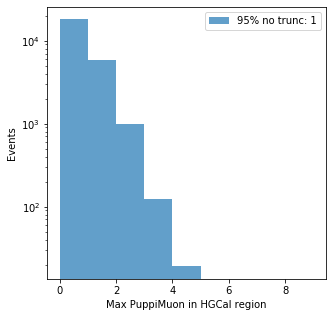

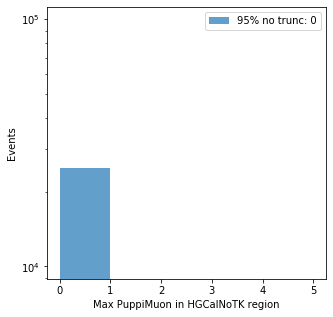

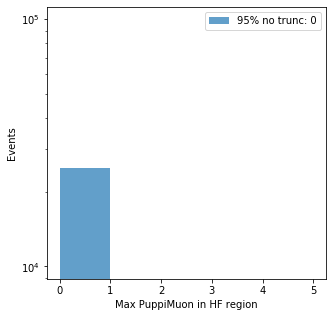

In [7]:
for obj in ['PuppiChargedHadron','PuppiNeutralHadron', 'PuppiElectron','PuppiPhoton', 'PuppiMuon']:
    for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
        top_N_max_hist, bot_N_max_hist = get_hists(objs=[obj], detector=detector, split=1, outdir=outdir)
        top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
        print(obj, detector, '95% no trunc.', 'top', top_N_max_hist_95cl)

PuppiChargedHadron+PuppiNeutralHadron+PuppiElectron+PuppiPhoton+PuppiMuon Barrel 95% no trunc. top 66
PuppiChargedHadron+PuppiNeutralHadron+PuppiElectron+PuppiPhoton+PuppiMuon HGCal 95% no trunc. top 39
PuppiChargedHadron+PuppiNeutralHadron+PuppiElectron+PuppiPhoton+PuppiMuon HGCalNoTK 95% no trunc. top 5
PuppiChargedHadron+PuppiNeutralHadron+PuppiElectron+PuppiPhoton+PuppiMuon HF 95% no trunc. top 1


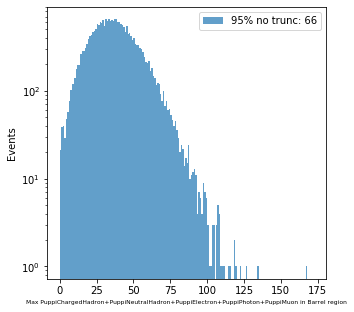

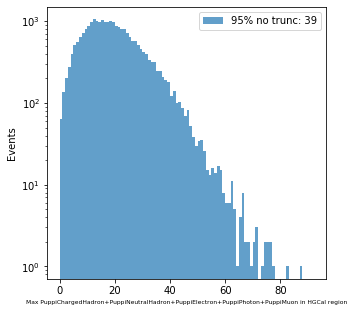

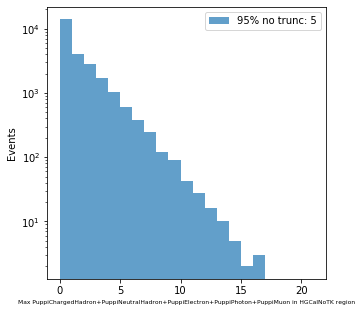

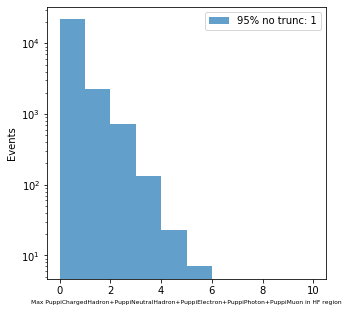

In [8]:
for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
    objs = ['PuppiChargedHadron','PuppiNeutralHadron', 'PuppiElectron','PuppiPhoton', 'PuppiMuon']
    top_N_max_hist, bot_N_max_hist = get_hists(objs=objs, detector=detector, split=1, outdir=outdir)
    top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
    print('+'.join(objs), detector, '95% no trunc.', 'top', top_N_max_hist_95cl)

PFChargedHadron+PFNeutralHadron+PFElectron+PFPhoton+PFMuon Barrel 95% no trunc. top 250
PFChargedHadron+PFNeutralHadron+PFElectron+PFPhoton+PFMuon HGCal 95% no trunc. top 198
PFChargedHadron+PFNeutralHadron+PFElectron+PFPhoton+PFMuon HGCalNoTK 95% no trunc. top 221
PFChargedHadron+PFNeutralHadron+PFElectron+PFPhoton+PFMuon HF 95% no trunc. top 49


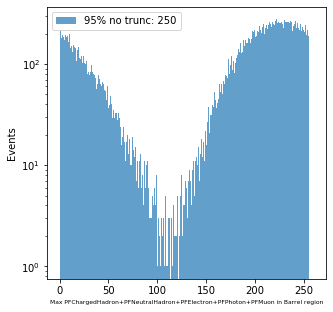

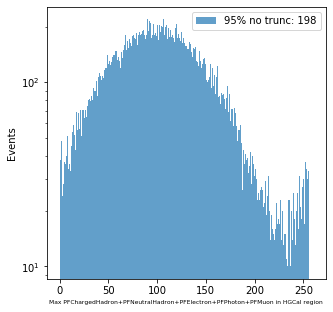

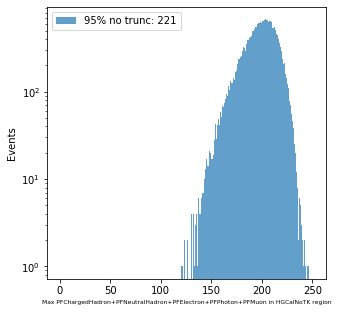

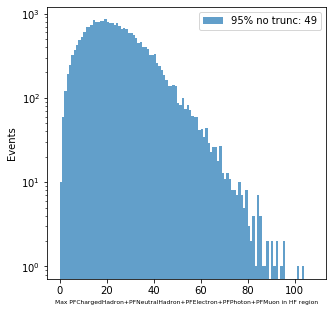

In [9]:
for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
    objs = ['PFChargedHadron','PFNeutralHadron', 'PFElectron','PFPhoton', 'PFMuon']
    top_N_max_hist, bot_N_max_hist = get_hists(objs=objs, detector=detector, split=1, outdir=outdir)
    top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
    print('+'.join(objs), detector, '95% no trunc.', 'top', top_N_max_hist_95cl)

In [10]:
def get_tot_hists(objs=['Calo'],detectors=['Barrel'], outdir='Plots/'):
    arrays = []
    for obj in objs:
        for detector in detectors:
            var = 'l1pfProducer%stotNL1%s'%(detector,obj)
            mask = tree.array('mc_id')==998
            array = tree.pandas.df([var]).values
            array = np.reshape(array, (tree.numentries, -1))
            array = array[mask]
            arrays.append(array)
    array = np.sum(arrays,axis=0)
    nregions = array.shape[1]
    array[:,::-1].sort(axis=-1)
    top_N = array[:,:]
    top_N_max = np.amax(top_N, axis=-1)
    bins = np.linspace(0, np.max(array)+2,  np.max(array)+3)
    top_N_max_hist = np.histogram(top_N_max,bins=bins)
    top_notrunc = get_max_notrunc(top_N_max_hist) 
    plt.figure(figsize=(5,5))
    plt.hist(top_N_max,bins=bins,alpha=0.7,label = '95%% no trunc: %i'%(top_notrunc))
    plt.semilogy()
    plt.xlabel('Tot %s in %s'%('+'.join(objs),'+'.join(detectors)), fontsize=6)
    plt.xlim(0, np.max(array)+3)
    plt.ylabel('Events')
    plt.legend()
    plt.savefig('%s/%sTot%s.pdf'%(outdir,''.join(objs),''.join(detectors)))
    return top_N_max_hist

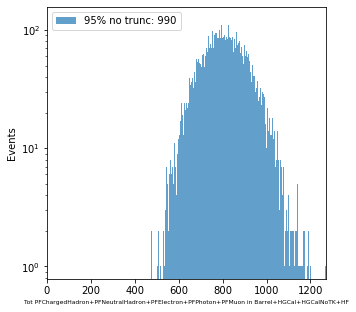

In [11]:
detectors = ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']
objs = ['PFChargedHadron','PFNeutralHadron', 'PFElectron','PFPhoton', 'PFMuon']
top_N_max_hist = get_tot_hists(objs=objs, detectors=detectors, outdir=outdir)
top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)

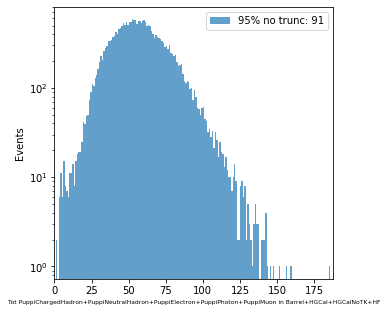

In [12]:
detectors = ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']
objs = ['PuppiChargedHadron','PuppiNeutralHadron', 'PuppiElectron','PuppiPhoton', 'PuppiMuon']
top_N_max_hist = get_tot_hists(objs=objs, detectors=detectors, outdir=outdir)
top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)

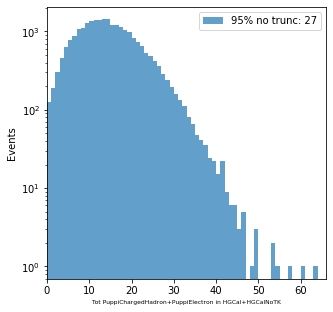

In [13]:
detectors = ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']
detectors = ['HGCal', 'HGCalNoTK']
objs = ['PuppiChargedHadron','PuppiElectron']
top_N_max_hist = get_tot_hists(objs=objs, detectors=detectors, outdir=outdir)
top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)

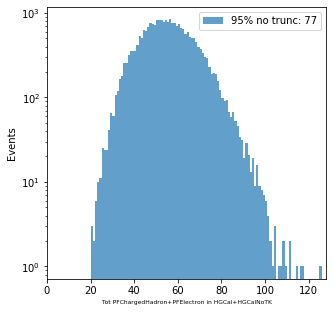

In [14]:
detectors = ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']
detectors = ['HGCal', 'HGCalNoTK']
objs = ['PFChargedHadron','PFElectron']
top_N_max_hist = get_tot_hists(objs=objs, detectors=detectors, outdir=outdir)
top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)

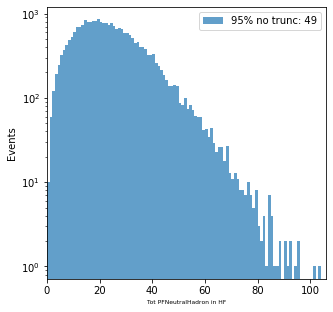

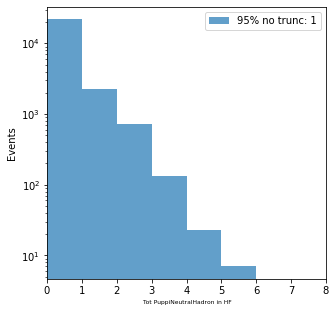

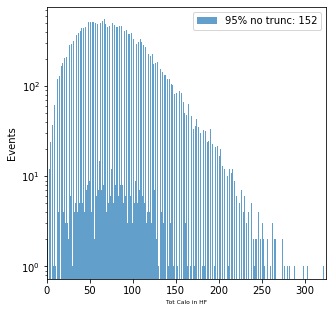

In [15]:
detectors = ['HF']
objs = ['PFNeutralHadron']
top_N_max_hist = get_tot_hists(objs=objs, detectors=detectors, outdir=outdir)
top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)

objs = ['PuppiNeutralHadron']
top_N_max_hist = get_tot_hists(objs=objs, detectors=detectors, outdir=outdir)
top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)

objs = ['Calo']
top_N_max_hist = get_tot_hists(objs=objs, detectors=detectors, outdir=outdir)
top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)

